In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../core-scripts")
import ShearSpectrum2D
from Utilities import clean_spec_2D, extract_max_re_sig, max_re
import matplotlib.lines as mlines
import ShearSpectrum2D as S2D
from cheb import cheb
import ShearSpectrum2D_ZeroK as S2D_ZeroK

In [3]:
# define the grid that Wan used to make figure 4
gdl,gdr,gdn = 0.0, 1.0, 11
gds = np.linspace(gdl, gdr, gdn)
al, ar, an = 0.0, 2.5, 26
acts = np.linspace(al, ar, an)

In [ ]:
# max_ev_k_var = np.zeros((an,gdn))

# for i in range(gdn):
#     for j in range(an):
#         tmp_max_evs = []
#         for k in range(21):
#                 tmp_max_evs.append(np.max(np.real(clean_spec_2D(k,gds[i],acts[j]))))
#         max_ev_k_var[j][i] = np.max(np.real(np.array(tmp_max_evs)))
#         print(f"    {j+1}/{an} activity values processed")
#     print(f"{i+1}/{gdn} shear values processed")

In [6]:
# np.savetxt("../../wan-figure-4-data-comparison/inf_length_channel_evs", max_ev_k_var)

In [4]:
# load in the data that Wan used to generate Figure 4 in her flow states manuscript
data_path = "../../wan-figure-4-data-comparison/"
wan_shears = np.loadtxt(data_path+"point_shear")
wan_activities = np.loadtxt(data_path+"point_activity")
wan_states = np.loadtxt(data_path+"point_state")

In [5]:
k_var_evs = np.load("./data/2D-wan-grid-kx_0-10-MULTIPLE_RES/spectra-mat.npy")
kxs = np.load("./data/2D-wan-grid-kx_0-10-MULTIPLE_RES/kxs.npy")
acts = np.load("./data/2D-wan-grid-kx_0-10-MULTIPLE_RES/acts.npy")
gds = np.load("./data/2D-wan-grid-kx_0-10-MULTIPLE_RES/gds.npy")

In [6]:
k_var_evs = k_var_evs[:,:,:,0,:]
max_re_evs = extract_max_re_sig(k_var_evs)
print(k_var_evs.shape)

(30, 11, 26, 50)


0.00130395618469756


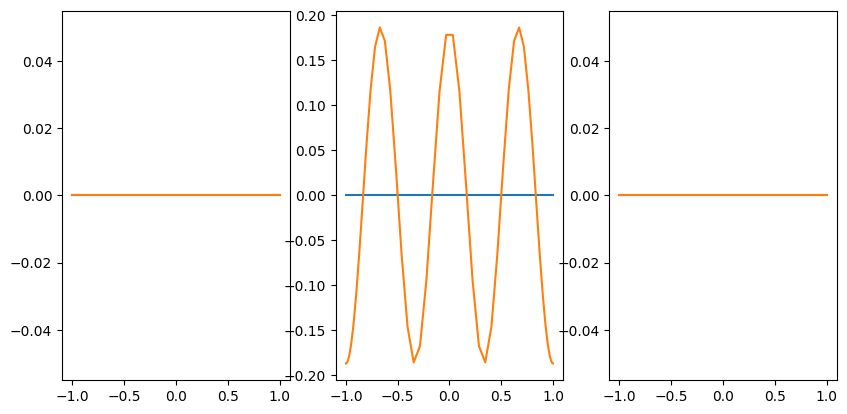

In [7]:
ev, modes = S2D.spectrum(k=0,gd=0,a=1.1,ell_over_W_squared=0.01)
# ev, modes = S2D_ZeroK.spectrum(gd=0,a=1.1, ell_over_W_squared=0.01)
# analytic_evs = (_act - 1 - 4*np.arange(0,100)**2 * np.pi * np.pi * 0.01)
_, y = cheb(50)
mode_num = -7
print(np.max(ev.real))
fig, axs = plt.subplots(1,3)
# plt.plot(ev.real)
# print(ev.shape)
# print(np.max(ev.real))
axs[0].plot(y, modes[:50,mode_num].real)
axs[0].plot(y, modes[:50,mode_num].imag)
axs[1].plot(y, modes[50:100,mode_num].imag)
axs[1].plot(y, modes[50:100,mode_num].real)
axs[2].plot(y, modes[100:150,mode_num].real)
axs[2].plot(y, modes[100:150,mode_num].imag)
fig.set_figwidth(10)
# plt.plot(modes[50:100,0].real)
# plt.plot(modes[100:150,0].real)
# plt.plot(np.sin(np.linspace(-1,1,50)))
# plt.plot(spec.real)
# print(np.max(spec.real))

## Comparing to Wan's data, we observe that the infinite channel admits marginally more unstable states than the finite channel, as expected
This could suggest that using infinite length channels allow us to explore ALL unstable modes.

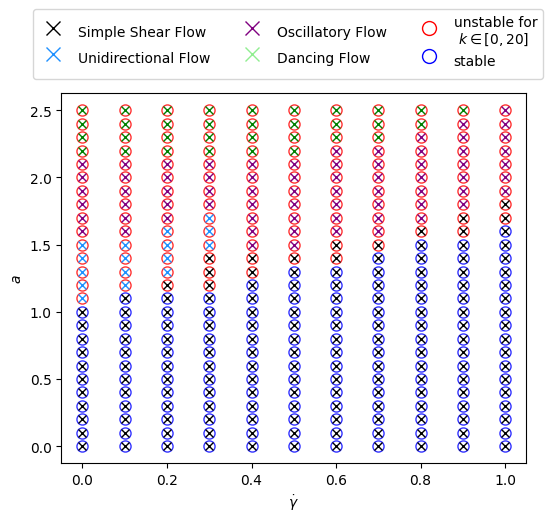

In [8]:
fig, ax = plt.subplots()
# plot computational results from my script
for i in range(len(gds)):
    for j in range(len(acts)):
        c = "red" if np.real(max_re_evs[i,j])>0 else "blue"
        plt.plot(gds[i], acts[j], "o", markersize=8, fillstyle='none', color=c, picker=True, alpha=0.8)
red_dot = mlines.Line2D([], [], color='red', marker='o', fillstyle='none', linestyle='None',
                      markersize=10, label='unstable for\n $k\in[0,20]$')
blue_dot = mlines.Line2D([], [], color='blue', marker='o', fillstyle='none', linestyle='None',
                      markersize=10, label='stable')
# my_legend = ax.legend(handles=[red_dot, blue_dot], bbox_to_anchor=(1.1, 1.05), handleheight=2.4, labelspacing=0.05, ncol=2, title="Infinite Length")
# ax.add_artist(my_legend)

# plot Wan's data on the same plot
num_points = len(wan_shears)
for i in range(num_points):
    if wan_states[i] == 0:
        c = "black"
    elif wan_states[i] == 2:
        c = "dodgerblue"
    elif wan_states[i] == 3:
        c = "purple"
    elif wan_states[i] == 4:
        c = "green"
    ax.plot(wan_shears[i], wan_activities[i], 'x', color=c, alpha=1.0)
lightblue_cross = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                      markersize=10, label='Simple Shear Flow')
orange_cross = mlines.Line2D([], [], color='dodgerblue', marker='x', linestyle='None',
                      markersize=10, label='Unidirectional Flow')
purple_cross = mlines.Line2D([], [], color='purple', marker='x', linestyle='None',
                      markersize=10, label='Oscillatory Flow')
lightgreen_cross = mlines.Line2D([], [], color='lightgreen', marker='x', linestyle='None',
                      markersize=10, label='Dancing Flow')
ax.legend(handles=[lightblue_cross, orange_cross, purple_cross, lightgreen_cross, red_dot, blue_dot], ncol=3,handleheight=2.4, labelspacing=0.05, loc=(-0.06,1.04))
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")
fig.set_figwidth(6)
# 5/31/2023
# As expected, there is some discrepancy between my infinite-length channel stability vs. 
# Wan's finite-length situation. Given that increasing k destabilizes the system at high 
# shear values, we would expect this discrepancy to grow at larger shear values than 2 here.
#
# I wonder though, if it is actually the wavenumbers that Wan's system cannot hold giving rise to the 
# instability?

In [56]:
# Finding the computational values of critical activity
m,n = max_re_evs.shape
crit_a = np.zeros(len(gds))

for i in range(len(gds)):
    for j in range(len(acts)-1):
        ev = max_re_evs[i,j]
        next_ev = max_re_evs[i,j+1]
        if np.real(ev) * np.real(next_ev) < 0:
            # print(ev, next_ev)
            crit_a[i] = (acts[j] + acts[j+1]) / 2
            # crit_a[i] = acts[j]
            break

# Expression for the simple linear stability analysis with 1D perturbation
ell_over_W_sq = 0.01
a1c = 2 * (1 + gds**2) * (1 + np.pi**2 * ell_over_W_sq)
a2c = (1+gds**2) * ((1 + np.pi**2 * ell_over_W_sq)**2 + gds**2) / (1 + np.pi**2 * ell_over_W_sq - gds**2)
# print(crit_a_1D_2)
# 2*W_wan = W_jasper
# l / W_wan = 0.1 => l/W_jasper = 2l/W_wan 
# crit_a_3D = acts[np.array([11, 12, 12, 12, 13, 13, 14, 15, 16, 17, 15])] # kz=0.3
crit_a_3D_low = [1.15, 1.15, 1.15, 1.25, 1.25, 1.25, 1.35, 1.35, 1.35, 1.45, 1.35] # kz=0.6
crit_a_3D_high = [1.15, 1.15, 1.15, 1.25, 1.35, 1.35, 1.35, 1.35, 1.35, 1.45, 1.35]

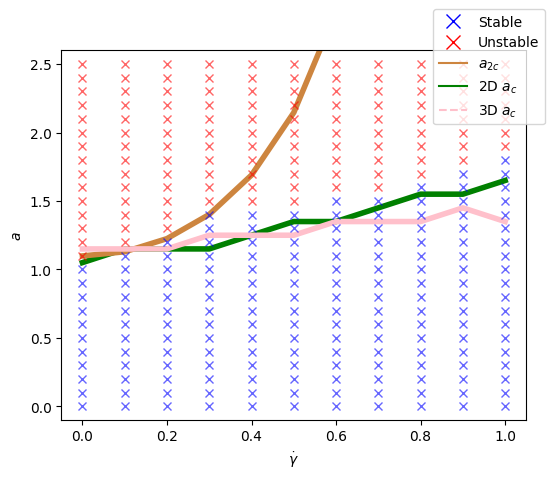

In [60]:
fig, ax = plt.subplots()
plt.plot(gds, crit_a, color="green", linewidth=4, label="Chebyshev in 2D")
# plt.plot(gds, a1c, color='blue', linewidth=5)
plt.plot(gds, a2c, color="peru", linewidth=4)
plt.plot(gds, crit_a_3D_low, color='pink', linewidth=4)
# plt.plot(gds, crit_a_3D_high, '--', color='pink', linewidth=2)
stab_1D_2 = mlines.Line2D([], [], color='peru', label='$a_{2c}$')
# stab_1D_1 = mlines.Line2D([], [], color='blue', label='$a_{1c}$')
stab_2D = mlines.Line2D([], [], color='green', label='2D $a_c$')
stab_3D = mlines.Line2D([], [], linestyle='--', color='pink', label='3D $a_c$')

# plot Wan's full nonlinear numerical solution on the same plot
num_points = len(wan_shears)
for i in range(num_points):
    if wan_states[i] == 0:
        c = "blue"
    else:
        c = "red"
    ax.plot(wan_shears[i], wan_activities[i], 'x', color=c, alpha=0.6)
lightblue_cross = mlines.Line2D([], [], color='blue', marker='x', linestyle='None',
                      markersize=10, label='Stable')
red_cross = mlines.Line2D([], [], color='red', marker='x', linestyle='None',
                      markersize=10, label='Unstable')
ax.legend(handles=[lightblue_cross, red_cross, stab_1D_2, stab_2D, stab_3D], ncol=1, loc=(0.8, 0.8))#, ncol=2,handleheight=2.4, labelspacing=0.05, loc=(-0.06,1.04))
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")
plt.ylim([-0.1, 2.6])
fig.set_figwidth(6)

# plt.title("$l^2/W^2=0.04$")
# NOTE: Do again with Wan's channel length, with (l/W)^2 = 0.04 instead of 0.01

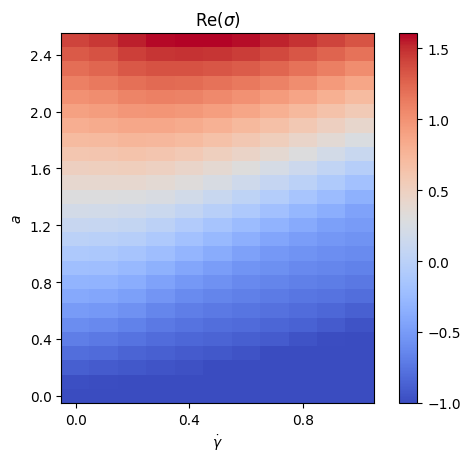

In [19]:
plt.imshow(max_re_evs.T.real, aspect=0.5, origin='lower', cmap='coolwarm')
plt.title('Re($\sigma$)')
plt.colorbar()
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")
plt.xticks(np.arange(0, gdn, 4), np.round(gds[::4],3))
plt.yticks(np.arange(0, an, 4), np.round(acts[::4],3));

1.7000000000000002
(10, 11, 26, 1, 50)


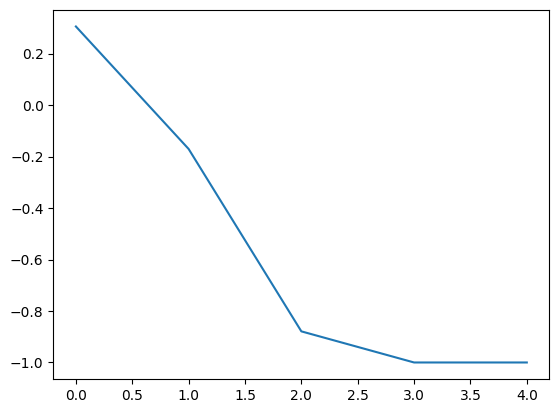

In [89]:
a_idx = 17
print(acts[a_idx])
plt.plot(k_var_evs[0,0,a_idx,0,:5].real)
print(k_var_evs.shape)

((0.3090912249669135+0j), 71) ((0.3090912258425673+0j), 110)


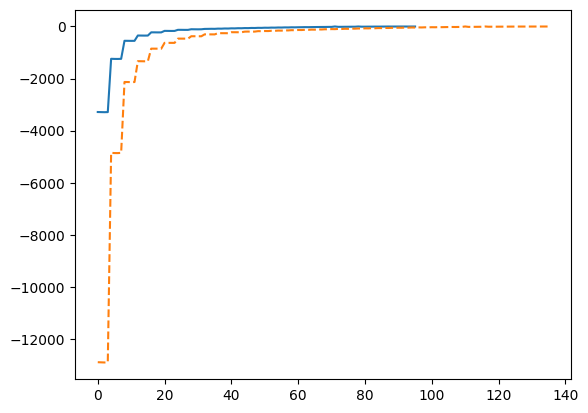

In [91]:
data_low = S2D.spectrum(0.5,0,1,acts[a_idx], _ell_over_W_squared=0.04, M=50)
data_high = S2D.spectrum(0.5,0,1,acts[a_idx], _ell_over_W_squared=0.04, M=70)
plt.plot(data_low.real)
plt.plot(data_high.real, '--')
print(max_re(data_low), max_re(data_high))
# plt.plot(data_high.real)

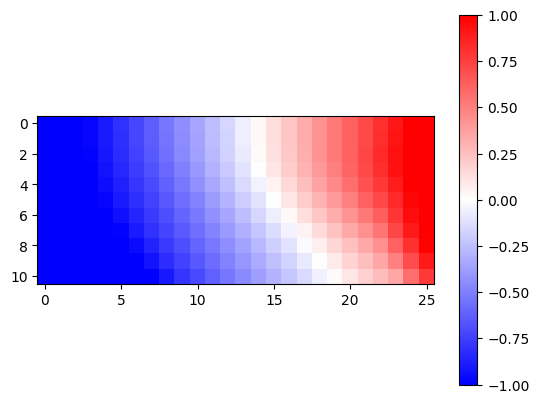

In [44]:
plt.imshow(np.real(max_re_evs), vmin=-1, vmax=1, cmap="bwr")
plt.colorbar()

## Studying the discrepancy in the plot

In [2]:
import os 
import sys
sys.path.append("../../core-scripts")
from Utilities import max_re
import matplotlib.pyplot as plt
import numpy as np

# Load in linear stability analysis data
folder_name = "data/2D-wan-grid-kx_0-20/"
kx = np.load(os.path.join(folder_name, "kxs.npy"))
gd = np.load(os.path.join(folder_name, "gds.npy"))
a = np.load(os.path.join(folder_name, "acts.npy"))
spec_mat = np.load(os.path.join(folder_name, "spectra-mat.npy"))

# Load in the data that Wan used to generate Figure 4 in her flow states paper
data_path = "../../wan-figure-4-data-comparison/"
wan_shears = np.loadtxt(data_path+"point_shear")
wan_activities = np.loadtxt(data_path+"point_activity")
wan_states = np.loadtxt(data_path+"point_state")

In [3]:
# sort each spectra first 
for i in range(len(gd)):
    for j in range(len(a)):
        for k in range(len(kx)):
            evs = spec_mat[k,i,j,:]
            spec_mat[k,i,j,:] = evs[np.argsort(-evs.real)]

# Take the max over each k, and search for the indices where there is discrepancy
spec_mat_max = np.zeros((len(gd), len(a)), dtype=np.complex128)
disc_idx = []
for i in range(len(gd)):
    for j in range(len(a)):
            spec_mat_max[i,j] = max_re(spec_mat[:,i,j,0])[0]
            if spec_mat_max[i,j].real>0 and wan_states[i*len(a) + j]==0:
                 disc_idx.append((i,j))

In [14]:
# NOTE: Uncomment to confirm that the data still gives the same stability plot
# for i in range(len(gd)):
#     for j in range(len(a)):
#         c = "red" if spec_mat_max[i,j]>0 else "blue"
#         plt.plot(gd[i], a[j], "o", markersize=8, fillstyle='none', color=c, picker=True, alpha=0.8)
# red_dot = mlines.Line2D([], [], color='red', marker='o', fillstyle='none', linestyle='None',
#                       markersize=10, label='unstable for\n $k\in[0,20]$')
# blue_dot = mlines.Line2D([], [], color='blue', marker='o', fillstyle='none', linestyle='None',
#                       markersize=10, label='stable')

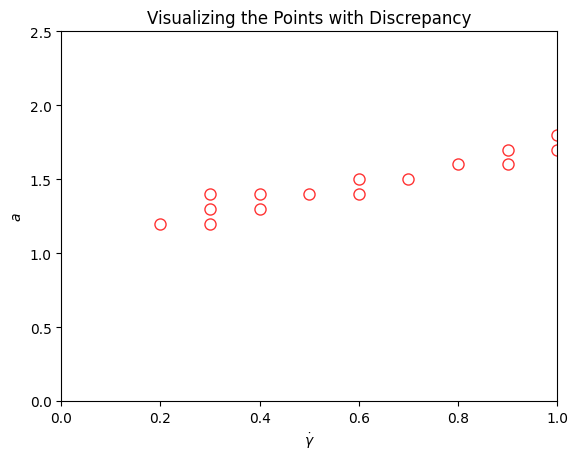

In [4]:
# Plot the points where there are disagreements 
for i, j in disc_idx:
    # print(spec_mat_max[i,j])
    plt.plot(gd[i], a[j], "o", markersize=8, fillstyle='none', color='red', picker=True, alpha=0.8)
plt.xlim([0,1])
plt.ylim([0,2.5])
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")
plt.title("Visualizing the Points with Discrepancy");

The analysis below shows that it is not because Wan's channel does not admit the wavelengths that the infinite-length channel admits. If it is a correct analysis, then it must be the case that somehow the linear stability is overly sensitive to the change in $k$.

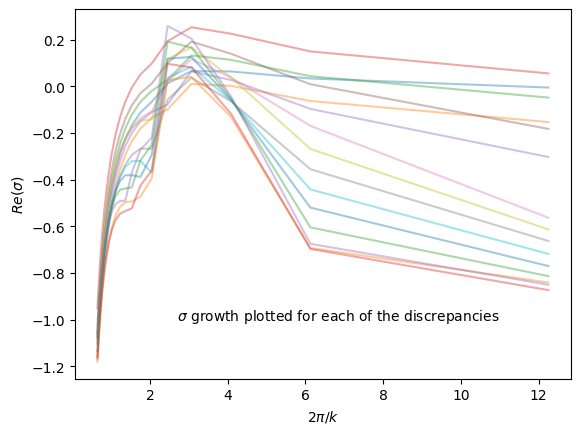

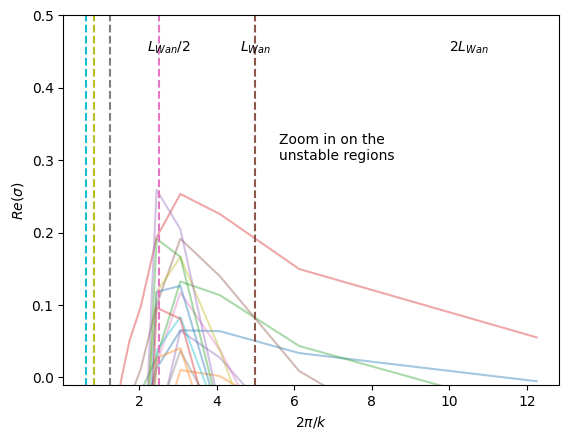

In [5]:
plt.figure()
for i,j in disc_idx:
    ev_k = spec_mat[:,i,j,0]
    plt.plot(2*np.pi / kx[1:20], ev_k.real[1:20], alpha=0.4)
# plt.plot(kx[0:10], spec_mat[0:10,2,23,0].real)
# plt.ylim([-0.05, 0.2])
plt.ylabel("$Re(\sigma)$")
plt.xlabel("$2\pi/k$")
plt.text(2.7, -1.0, "$\sigma$ growth plotted for each of the discrepancies")
plt.show()

WAN_CHNL_LEN = 2.5 # Five times the width
for i,j in disc_idx:
    ev_k = spec_mat[:,i,j,0]
    plt.plot(2*np.pi / kx[1:20], ev_k.real[1:20], alpha=0.4)
    
plt.plot(np.zeros(10)+2*WAN_CHNL_LEN, np.linspace(-1.0,0.5,10), '--')
plt.plot(np.zeros(10)+WAN_CHNL_LEN, np.linspace(-1.0,0.5,10), '--')
plt.plot(np.zeros(10)+WAN_CHNL_LEN/2, np.linspace(-1.0,0.5,10), '--')
plt.plot(np.zeros(10)+WAN_CHNL_LEN/3, np.linspace(-1.0,0.5,10), '--')
plt.plot(np.zeros(10)+WAN_CHNL_LEN/4, np.linspace(-1.0,0.5,10), '--')

plt.ylim([-0.01, 0.5])
plt.ylabel("$Re(\sigma)$")
plt.xlabel("$2\pi/k$")
plt.text(4.6,0.45,"$L_{Wan}$")
plt.text(10,0.45,"$2L_{Wan}$")
plt.text(2.2,0.45,"$L_{Wan}/2$")
plt.text(5.6,0.3, "Zoom in on the \nunstable regions")
plt.show()

### Plotting the 2D Linear Stability at Different Resolutions
Different resolutions do not change the critical activity boundary

In [17]:
import sys
sys.path.append("../../core-scripts")
import Utilities
import os

folder_name = "data/2D-wan-grid-kx_0-10-MULTIPLE_RES/"
kx = np.load(os.path.join(folder_name, "kxs.npy"))
gd = np.load(os.path.join(folder_name, "gds.npy"))
a = np.load(os.path.join(folder_name, "acts.npy"))
spec_mat = np.load(os.path.join(folder_name, "spectra-mat.npy"))
print(spec_mat.shape)

(30, 11, 26, 3, 50)


Text(0.5, 1.0, '2D Critical Activity at Different Chebyshev Grid Resolutions')

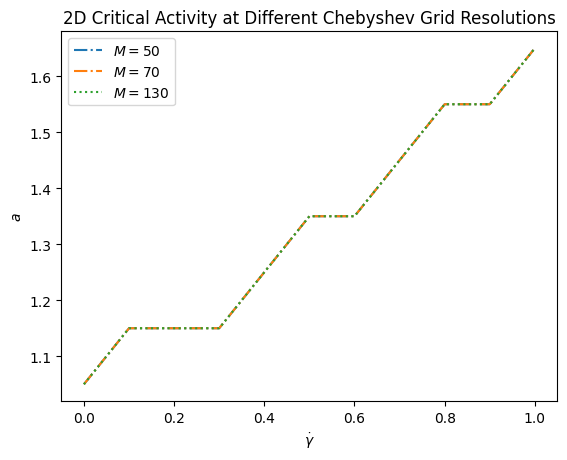

In [18]:
NUM_RES = spec_mat.shape[3]
styles = ['dashdot','-.',':']
RESOLUTIONS = ["50", "70", "130"]
for i in range(NUM_RES):
    max_re_sig = Utilities.extract_max_re_sig(spec_mat[:,:,:,i,:])
    crit_a = Utilities.extract_crit_a(max_re_sig, a)
    plt.plot(gd, crit_a, label=f"$M={RESOLUTIONS[i]}$", linestyle=styles[i])
plt.legend()
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")
plt.title("2D Critical Activity at Different Chebyshev Grid Resolutions")

In [86]:
l_evs = []
h_evs = []

for i in range(len(acts)):
    l = ShearSpectrum2D.spectrum(1, 0.0, 1, acts[i])
    h = ShearSpectrum2D.spectrum(1, 0.0, 1, acts[i], _ell_over_W_squared=0.04)
    l_evs.append(max_re(l)[0])
    h_evs.append(max_re(h)[0])

Text(0.5, 1.0, 'Correlation length affects 2D linear stability even at zero shear')

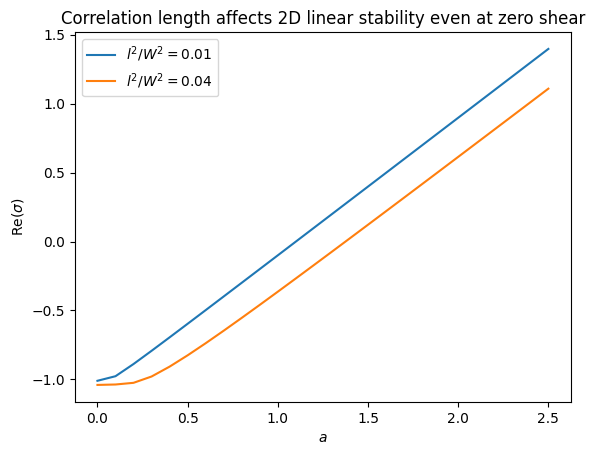

In [93]:
# print(l_evs)
# print(h_evs)
plt.figure()
l_evs = np.array(l_evs, dtype=np.complex128)
h_evs = np.array(h_evs, dtype=np.complex128)
plt.plot(acts, l_evs.real, label="$l^2/W^2=0.01$")
plt.plot(acts, h_evs.real, label="$l^2/W^2=0.04$")
plt.legend()
plt.ylabel("Re($\sigma$)")
plt.xlabel("$a$")
plt.title("Correlation length affects 2D linear stability even at zero shear")